Day 2 tutorial codebook

## Quantum Teleportation

Let me start by answering the most asked question. Are we teleporting to past?

The answer is no.

Then what does teleportation stands for?

Well we are transfering something but not beyond the speed of light, so time travell is not possible, yet the protocol has it's own elegance.
This is due to the no-cloning theorem.
This theorem says, we can't send a quantum state's replica to another person (a quantum xerox machine is impossible!).
Here quantum teleportation protocol plays a graceful role as you will see.


### No cloning theorem

We first describe the no-clonning theorem. Say, you have a quantum state $|\psi>$ and you want to copy it. Now the standard method for copying resembles the classical one. Copy the desired state onto another ancillary state, let the quantum xerox machine `U` does this.

\begin{align}
U (\ket{\alpha} \otimes \ket{\phi}) = \ket{\alpha}\otimes \ket{\alpha}\\
U (\ket{\beta} \otimes \ket{\phi}) = \ket{\beta} \otimes \ket{\beta}
\end{align}

Following the above, we expect 
$$U [(\ket{\alpha} + \ket{\beta}) \otimes \ket{\phi}] = (\ket{\alpha} + \ket{\beta}) \otimes (\ket{\alpha} + \ket{\beta})$$

but if you expand the left hand side of the above equation,
\begin{align*}
U [(\ket{\alpha} + \ket{\beta}) \otimes \ket{\phi}] &= U(\ket{\alpha} \otimes \ket{\phi}) + U(\ket{\beta} \otimes \ket{\phi}),\\
&= (\ket{\alpha} \otimes \ket{\alpha}) + (\ket{\beta} \otimes \ket{\beta}),\\
&\neq (\ket{\alpha} + \ket{\beta}) \otimes (\ket{\alpha} + \ket{\beta}).
\end{align*}

Thus one can not design a unitary quantum circuit which can produce a exact copy of an unknown quantum state.

In [1]:
# Import Pennylane module ->
import pennylane as qml

In [63]:
# Make a clonning circuit for |1>

# Define a quantum device
device = qml.device("default.qubit", wires = 2)

# Initialize the qubit ->
def initialize(state: str):   # possibility of states: "zero", "one", "plus".
    if state == "one":
        qml.PauliX(wires=0)
    if state == "plus":
        qml.Hadamard(wires=0)
    else:
        pass

# 2 qubit clonning operation U = CNOT
def clone():
    qml.CNOT(wires=[0,1])

@qml.qnode(device)
# The quantum clonning circuit                           
def qxerox():                                # Your code goes here ->
    # Initialize first qubit in state |1>
    initialize(state="one")
    # Apply cloning
    clone()
    return qml.state()

In [64]:
# execute the clonning circuit:
qxerox()

tensor([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j], requires_grad=True)

In [69]:
# Make clonning circuit for |+> state

@qml.qnode(device)                            
def clone_superposition():
    initialize(state="plus")
    clone()

    return qml.state()

In [70]:
clone_superposition()

tensor([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j], requires_grad=True)

### Teleportation

Now we describe the protocol which can transfer an unknown quantum state without copying the same. Say, Alice and Bob are the two parties involved in this communication protocol. The ony condition is that by some means they must share an entangled pair of qubits with them.

The quantum circuit for teleporting an unknown single qubit state is shown below;

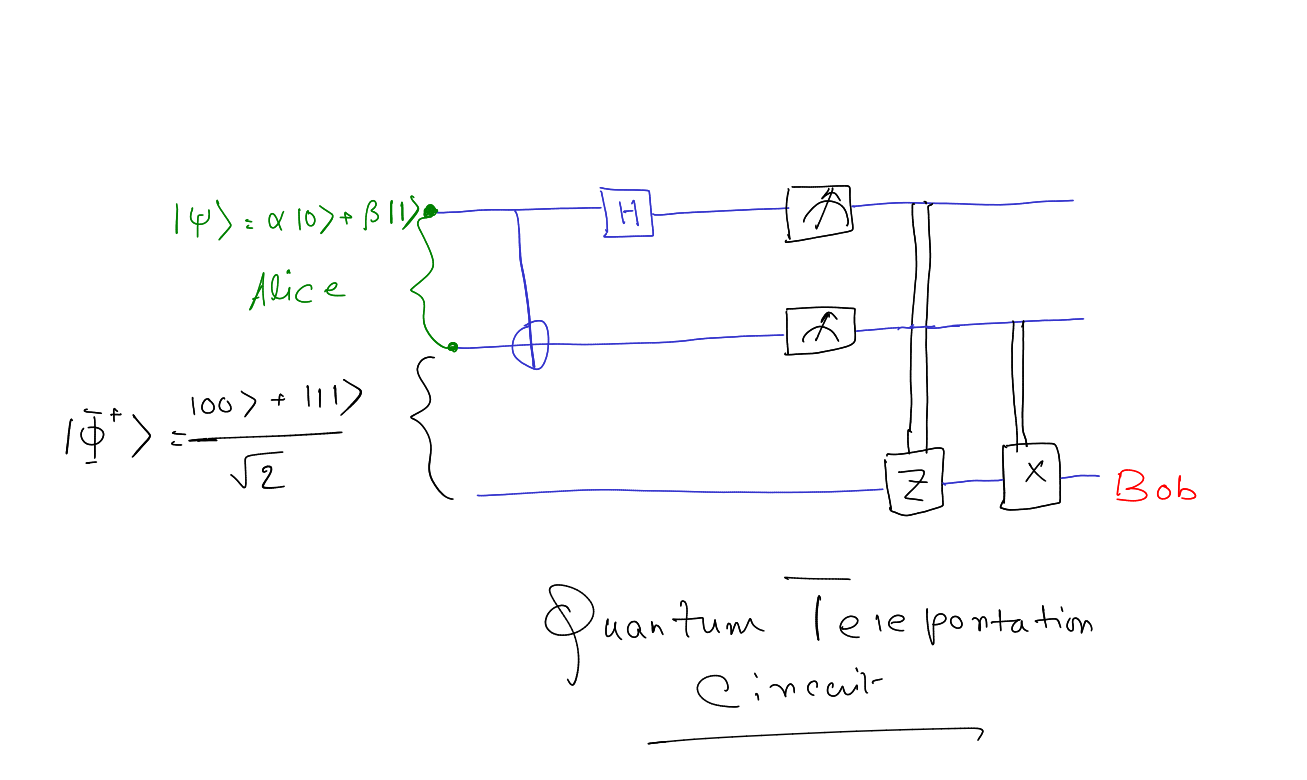

The protocol:
1. Alice wants to send state $|\psi> = \alpha \ket{0} + \beta \ket{1}$.
2. Alice and Bob share a bit of the maximally entangled state $\ket{\phi^{+}} = \frac{\ket{00} + \ket{11}}{2}$.
3. Alice applies a CNOT gate from her qubit to the shared entangled qubit she has.
4. Following the CNOT she applies a hadamard gate on her qubit.
5. Alice measures both her qubits in `Z` basis.
6. Alice sends her measurement results to Bob.
7. Bob locally applies some gates depending on the Alice's results.

Notations:

We use the following qubit convention:
1. Alice's message qubit: $\ket{m}$
2. Alice's shared entangled qubit: $\ket{a}$
3. Bob's shared entangled qubit: $\ket{b}$

Task 1: Prepare the entangled state $\ket{\phi^{+}} = \frac{\ket{00} + \ket{11}}{2}$.

$\ket{a}$ qubit is shared with Alice and $\ket{b}$ qubit is shared with Bob.

In [41]:
#this step is used to prepare an entangled state between alice and bob

# Prepares the Bell state.
def bell_state():
    qml.Hadamard(wires='a')
    qml.CNOT(wires=['a','b'])
    
    # Your code goes here ->

Task 2: Alice prepares the message qubit $\ket{m}$

In [42]:
#this is basically state preparation in which Alice is preparing the state which she wants to send out to bob

# let the message to be sent is |m> = 0.5*(|0> + |1>)
def message():
    # Your code goes here ->
    qml.Hadamard(wires='m')
    

Task 3: Alice's circuit

In [44]:
def circuit_alice():
    # Your code goes here ->
    qml.CNOT(wires=['m','a'])
    qml.Hadamard(wires='m')
    

Task 4: Complete the teleportation protocol and return Bob's state

In [56]:
#here we are doing change of basis

# Define a quantum device
device = qml.device("default.qubit", wires=["m", "a", "b"])

@qml.qnode(device)
# The complete protocol
def teleportation_circuit():
    # Your code goes here ->
    bell_state()
    
    # Entangled state preparation.

    # Prepare the message.
    message()
    # Alice executes her part.
    circuit_alice()
    # Alice's measurements.
    a1 = qml.measure("m")
    a2 = qml.measure("a")
    # Bob applis conditional gates.
    qml.cond(a1, qml.PauliZ)("b")
    qml.cond(a2, qml.PauliX)("b")
    # Return the quantum state of Bob.
    return qml.density_matrix(wires=["b"])

#ZX and XZ doesn't matter because global phase doesn't matter in the measurement

print(f"{teleportation_circuit()}")

[[0.5+0.j 0.5+0.j]
 [0.5+0.j 0.5+0.j]]


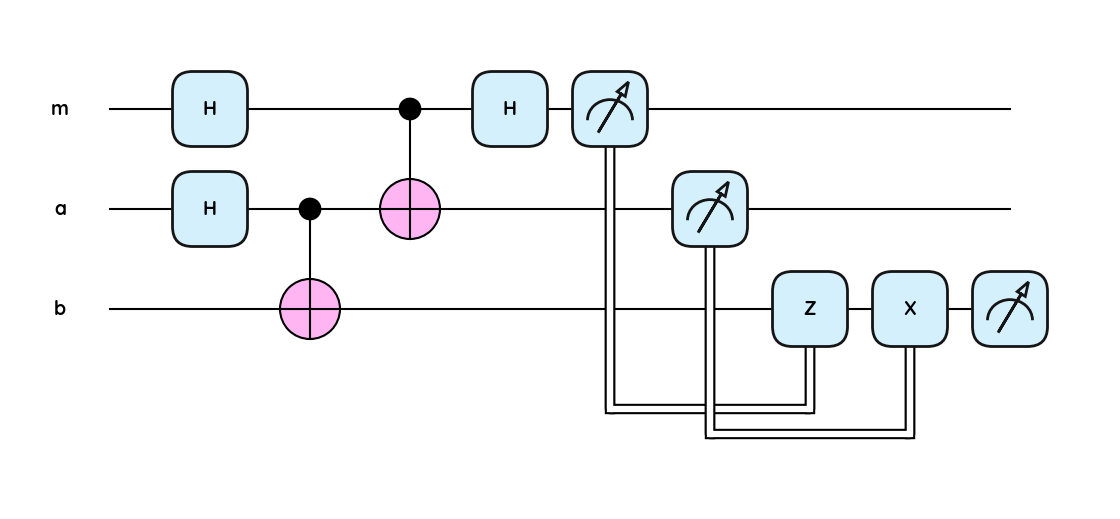

In [52]:
# Visualize the teleportation circuit
_ = qml.draw_mpl(teleportation_circuit, style="pennylane")()

Bob's final state:

In [50]:
# Execute the protocol.
teleportation_circuit()

tensor([[0.5+0.j, 0.5+0.j],
        [0.5+0.j, 0.5+0.j]], requires_grad=True)